# Logistic Regression

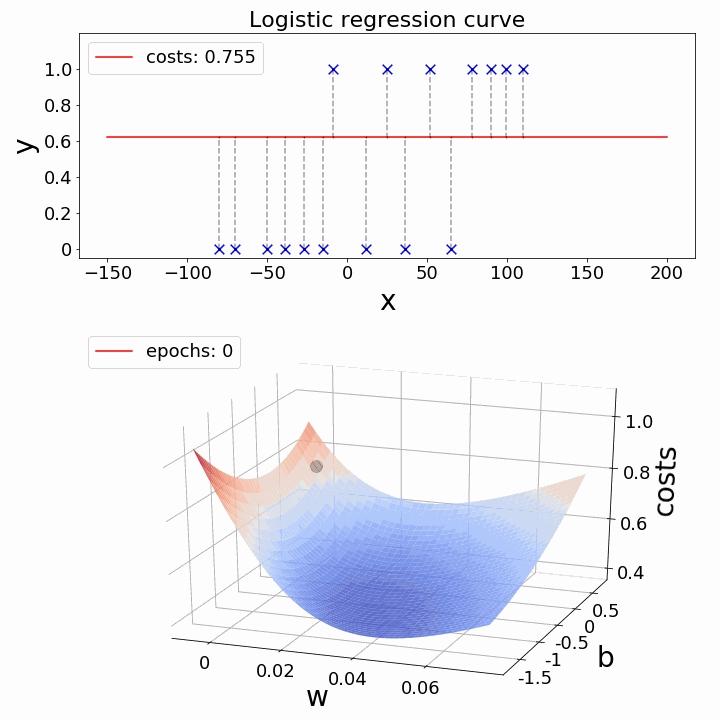

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('hearing_test.csv') #../data&resources/

In [3]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [4]:
df.shape

(5000, 3)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

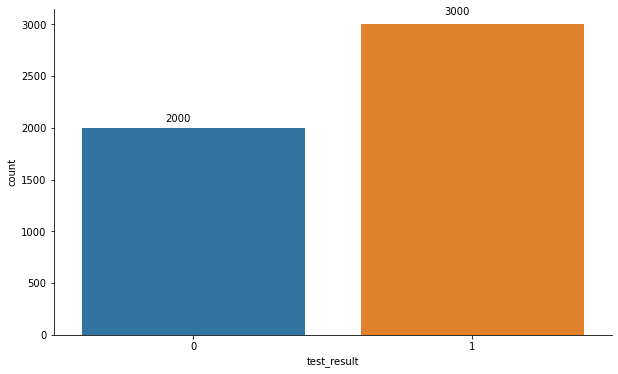

In [8]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

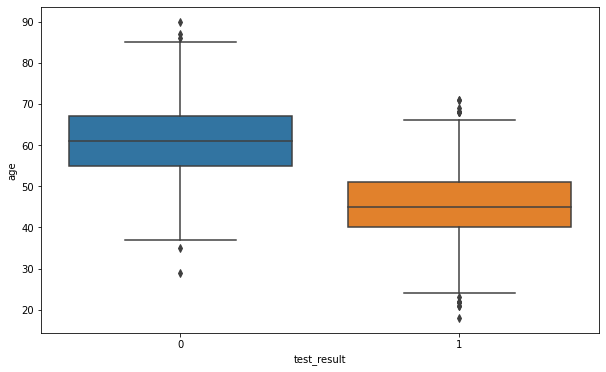

In [9]:
sns.boxplot(x='test_result',y='age',data=df);

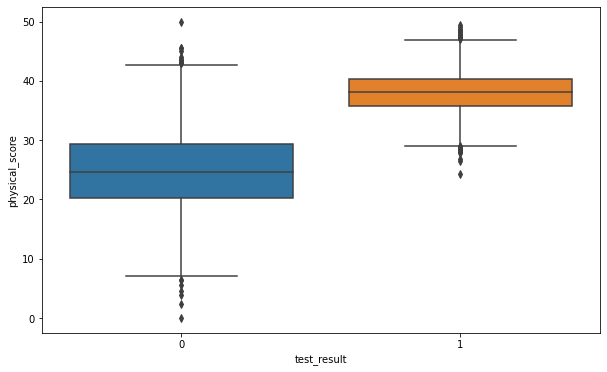

In [10]:
sns.boxplot(x='test_result',y='physical_score',data=df);

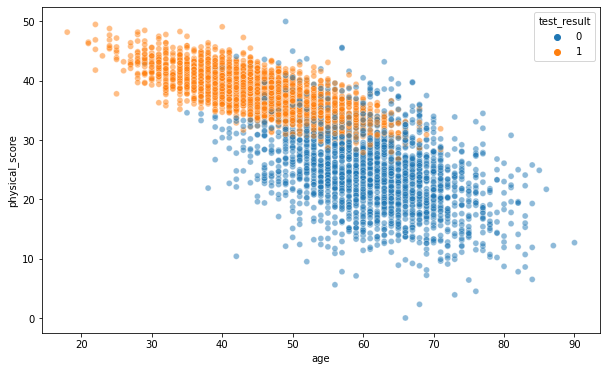

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5);

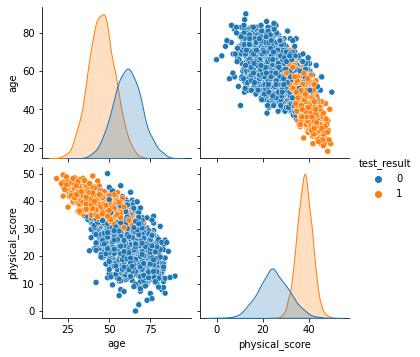

In [12]:
sns.pairplot(df,hue='test_result');

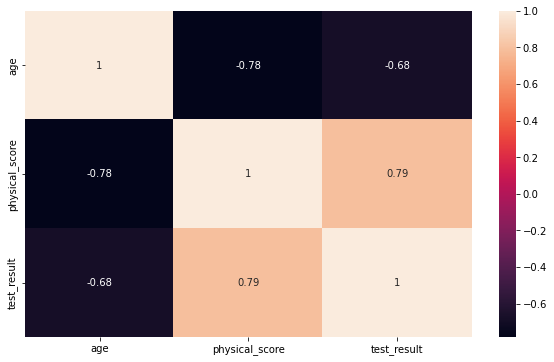

In [13]:
sns.heatmap(df.corr(), annot=True);

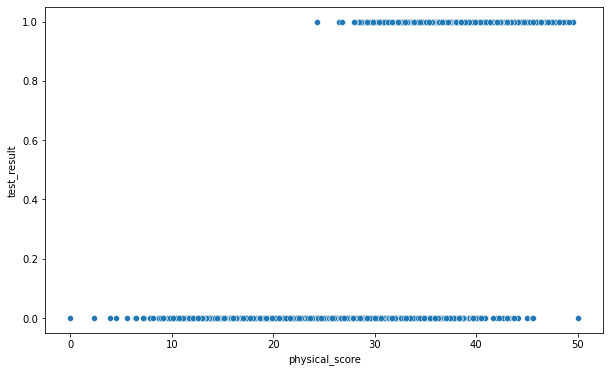

In [14]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

## Train | Test Split and Scaling

In [15]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [20]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [21]:
#help(LogisticRegression)

In [22]:
log_model = LogisticRegression()
# icindeki c'yi kuculterek regularization gucunu artirabiliriz
# default olarak l2'ya gore, yani ridge'a gore regularization yapar

In [23]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [25]:
log_model.intercept_

# intercept negatif olanlar genelde 0 iken, pozitif olanlar genelde 1
# bu durumu age ve physical score'u 0 olanlar testten gececek gibi bir yorum yapilabilir

array([0.48867341])

In [26]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


In [27]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [28]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

# her bir satir icin ilk deger o satirdaki observation'in 0 olma olasiligi ve 1 olma olasiligi
# prediction'i da hangisi 0.5'in uzerindeyse o olarak karar veriyor

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [29]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [30]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [31]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [32]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
2092,43.000,40.100,1,0.987,1
4613,47.000,27.800,0,0.230,0
4709,52.000,38.000,1,0.937,1
2152,47.000,34.000,1,0.806,1
2941,28.000,40.400,1,0.997,1
954,42.000,35.000,1,0.906,1
3335,54.000,22.800,0,0.019,0
3249,58.000,33.700,1,0.591,1
378,40.000,39.300,1,0.986,1
3958,53.000,32.500,1,0.569,1


## Model Performance on Classification Tasks

In [1]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# bunlari precision_score(y_test, y_pred) seklinde kullaniyoruz

In [2]:
from sklearn.metrics import SCORERS

In [5]:
SCORERS

# bunlari ise cross validation ve gridsearchcv icerisinde scoring icinde kullaniyoruz

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [34]:
accuracy_score(y_test,y_pred)

0.93

In [35]:
log_model.score(X_test_scaled, y_test)

# classification model'de score islemi default olarak accuracy'yi veriyor

0.93

In [36]:
precision_score(y_test, y_pred)
# pos_label = 1 oldugu icin 1 sinifinin precision degerini doner

0.9331210191082803

In [37]:
recall_score(y_test, y_pred)

0.9543973941368078

In [38]:
f1_score(y_test,y_pred, average = "weighted")

0.9297480869650194

In [39]:
roc_auc_score(y_test, y_pred)

0.9227945519906837

In [40]:
#########################

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[172,  21],
       [ 14, 293]])

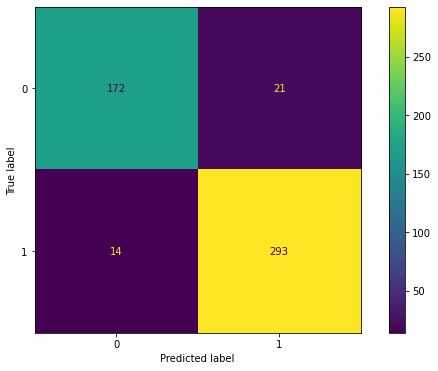

In [43]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
plot_confusion_matrix(log_model, X_test_scaled, y_test);

# 172 = TN
# 21 = FP
# 14 = FN
# 293 = TP

# 1 - True / Positive
# 2 - False / Negative

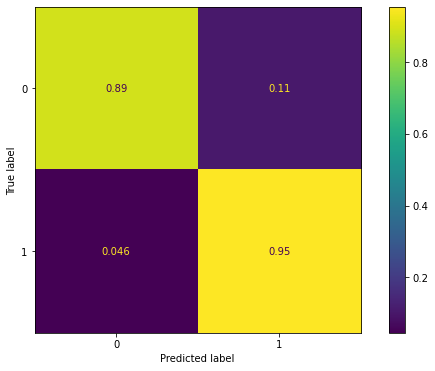

In [44]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [45]:
print(classification_report(y_test,y_pred))

# recall yuksek, precision dusuk ise modelim salliyor demektir
# precision yuksek, recall dusuk ise modelim az tahmin yapiyor demektir

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [48]:
# macro imbalance datalarda kullanilir. 0 ve 1'in verilerini toplayip 2'ye boler
# weighted ise balanced datalarda kullanilir. n verilerine gore agirlikli olarak hesaplama yapar
# micro skoru, burada gorunmuyor, accuracy skoru ile esittir
# weighted n'i buyuk olana gore kayma yapabilir, buna dikkat edilmeli
# Imbalanced datada macro'ya bakmak gerekir
# datam dengeli ise micro'yu, yani accuracy'yi kullanabilirim

In [46]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



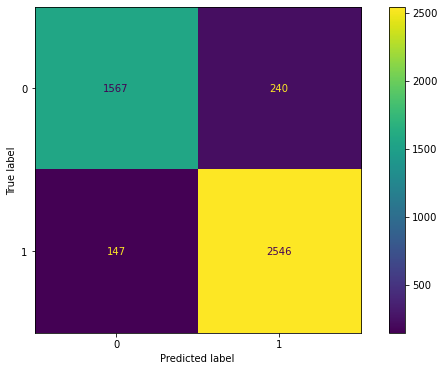

In [47]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

In [50]:
from sklearn.model_selection import cross_validate

In [51]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [52]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# her zaman 1 sinifina ait skorlari hesaplar

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.033,0.011,0.900,0.889,0.952,0.919
2,0.031,0.007,0.924,0.921,0.956,0.938
3,0.029,0.007,0.936,0.917,0.981,0.948
4,0.013,0.007,0.931,0.938,0.948,0.943
5,0.012,0.005,0.938,0.941,0.955,0.948
6,0.015,0.006,0.902,0.934,0.900,0.917
7,0.015,0.006,0.898,0.889,0.948,0.917
8,0.012,0.008,0.911,0.896,0.963,0.928
9,0.013,0.006,0.891,0.910,0.907,0.909
10,0.013,0.006,0.916,0.911,0.952,0.931


In [53]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [54]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [7]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

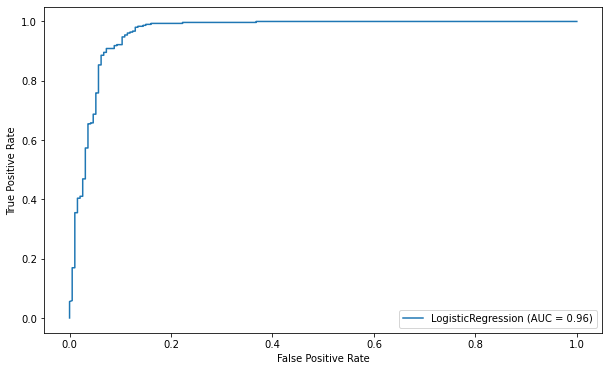

In [58]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [59]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

In [61]:
roc_auc_score(y_test, y_pred)
# bu dogru degil, pred_proba'yi kullanmamiz gerekiyor

0.9227945519906837

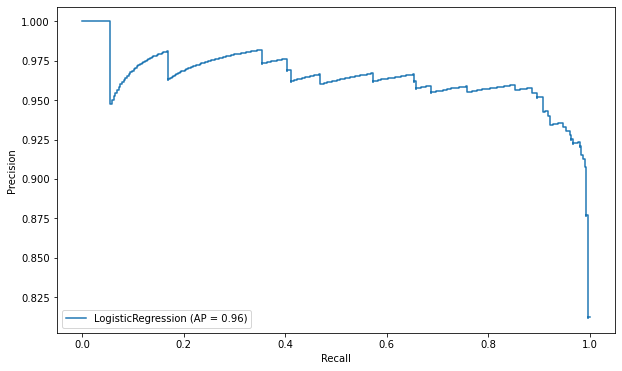

In [62]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);
# imbalanced datalarda bunu kullanabiliriz

## Final Model and Model Deployment

In [63]:
scaler = StandardScaler().fit(X)
# training bitti, artik tum datayi scale yapiyorum

In [65]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))
# scaler_hearing olarak kaydetmek istedigimiz icin
# wb ya da w yazarak localimize kaydetmek icin

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_model = LogisticRegression().fit(X_scaled, y)

In [68]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [69]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [70]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [71]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))
# rb okuma yapmak icin

In [74]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [75]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [76]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [77]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
